In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_breast_cancer
import seaborn as sns

## 1- Data

#### a-Dataset load

In [4]:
data=load_breast_cancer()
X=data.data
y=data.target
columns=data.feature_names
target_names=data.target_names
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

In [5]:
dt=pd.DataFrame(X)

In [6]:
dt.columns=columns

In [7]:
dt['target']=y

In [8]:
dt

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


##### reverse malignant and benign

In [10]:
dt.loc[dt['target'] == 1, 'target'] = -1
dt.loc[dt['target'] == 0, 'target'] = 1
dt.loc[dt['target'] == -1, 'target'] = 0

In [11]:
dt

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,1
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,1
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,1
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,1
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,1
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,1
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,1
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,1


#### b- Dataset visualisation

In [13]:
dt.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.372583
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,0.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


<Axes: >

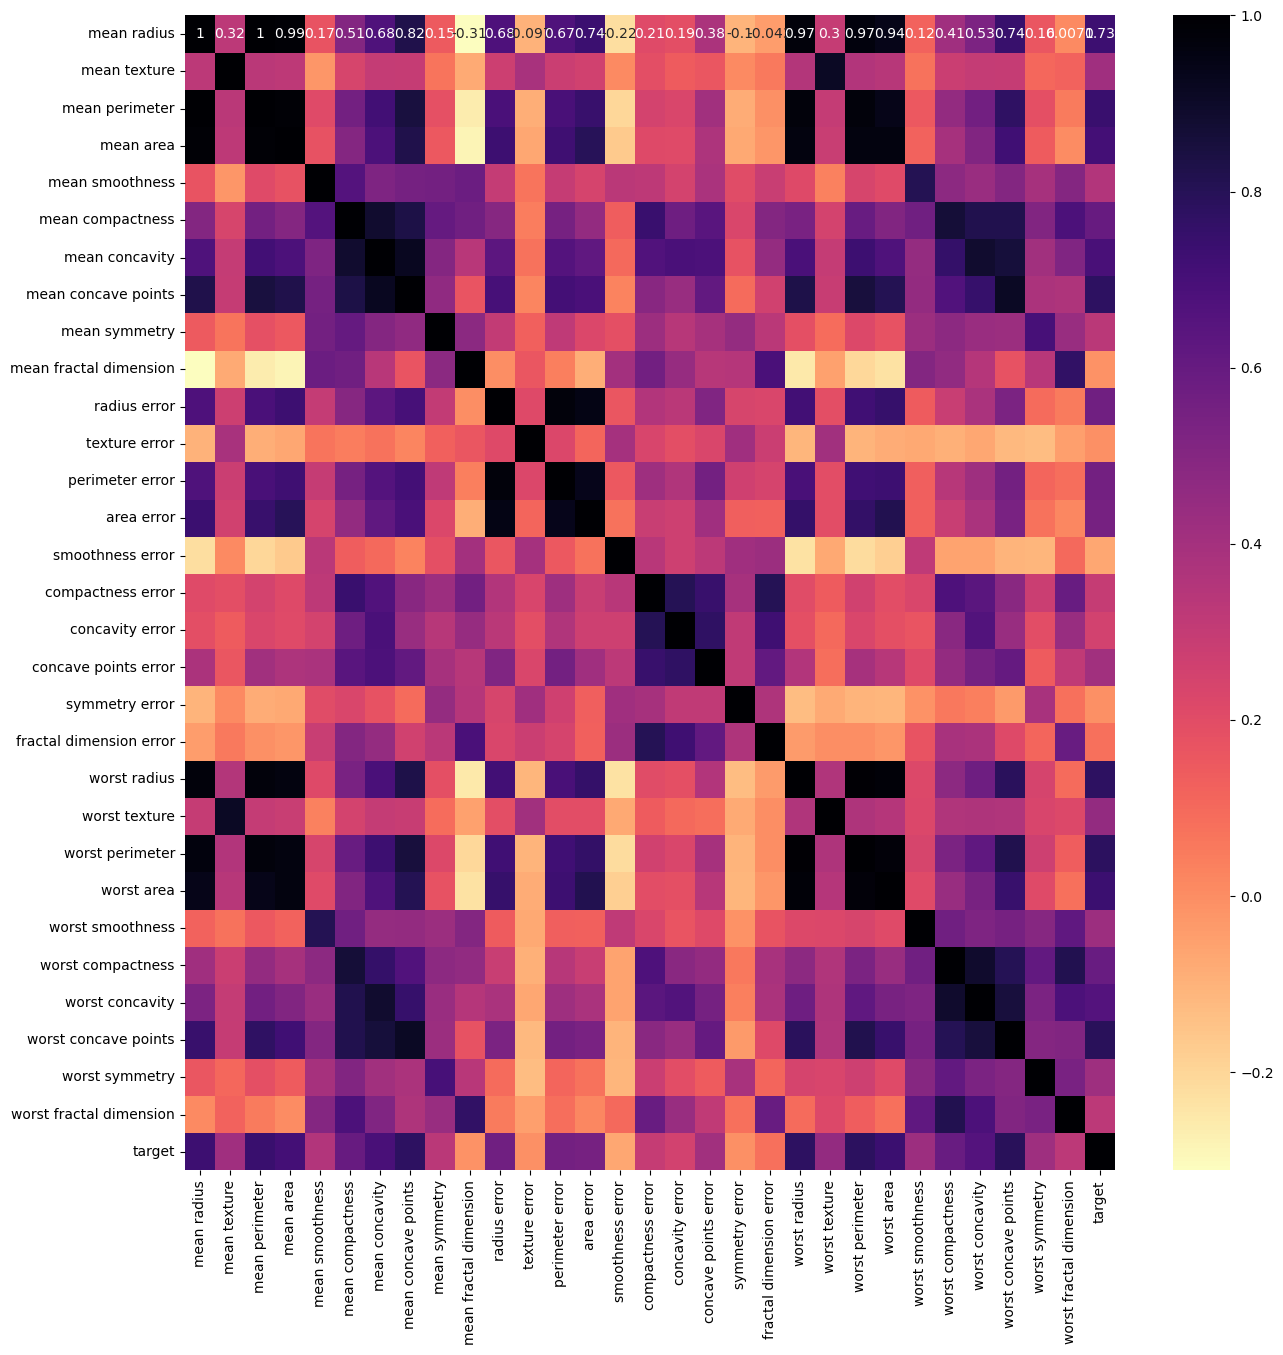

In [14]:
corr_matrix=dt.corr()
#set the size of figure
plt.figure(figsize=(15,15))
sns.heatmap(corr_matrix,annot=True,cmap=plt.cm.magma_r)

In [15]:
dt.corr()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,-0.311631,...,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066,0.730029
mean texture,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,-0.076437,...,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205,0.415185
mean perimeter,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,-0.261477,...,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019,0.742636
mean area,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,-0.283110,...,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738,0.708984
mean smoothness,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,0.584792,...,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316,0.358560
mean compactness,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,0.565369,...,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382,0.596534
mean concavity,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,0.336783,...,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930,0.696360
mean concave points,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,0.166917,...,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661,0.776614
mean symmetry,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,0.479921,...,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413,0.330499
mean fractal dimension,-0.311631,-0.076437,-0.261477,-0.283110,0.584792,0.565369,0.336783,0.166917,0.479921,1.000000,...,-0.051269,-0.205151,-0.231854,0.504942,0.458798,0.346234,0.175325,0.334019,0.767297,-0.012838


In [16]:
from sklearn.model_selection import train_test_split 

In [17]:
X=dt.drop('target',axis=1)
y=dt['target']

In [18]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=300,train_size=0.7)

## 2- train different Models

In [20]:
from sklearn.model_selection import GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import confusion_matrix,precision_score,recall_score

In [21]:
#Define cross validation method 
cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=2, 
                                    random_state=300)

#### a- SVC model

##### **training**

In [24]:
from sklearn.svm import SVC

In [25]:
SVC_params={'C':[i for i in range(1,102,5)],'kernel':['rbf','poly']}

In [26]:
SVC_gridsearch_acc=GridSearchCV(estimator=SVC(),
                            param_grid=SVC_params,
                            cv=cv_method,
                            verbose=3)

In [27]:
SVC_gridsearch_acc.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END ..................C=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 2/10] END ..................C=1, kernel=rbf;, score=0.875 total time=   0.0s
[CV 3/10] END ..................C=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 4/10] END ..................C=1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 5/10] END ..................C=1, kernel=rbf;, score=0.949 total time=   0.0s
[CV 6/10] END ..................C=1, kernel=rbf;, score=0.938 total time=   0.0s
[CV 7/10] END ..................C=1, kernel=rbf;, score=0.900 total time=   0.0s
[CV 8/10] END ..................C=1, kernel=rbf;, score=0.925 total time=   0.0s
[CV 9/10] END ..................C=1, kernel=rbf;, score=0.924 total time=   0.0s
[CV 10/10] END .................C=1, kernel=rbf;, score=0.873 total time=   0.0s
[CV 1/10] END .................C=1, kernel=poly;, score=0.912 total time=   0.0s
[CV 2/10] END .................C=1, kernel=pol

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=SVC(),
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96, 101],
                         'kernel': ['rbf', 'poly']},
             verbose=3)

In [28]:
print(SVC_gridsearch_acc.best_params_)
print(SVC_gridsearch_acc.best_score_)

{'C': 91, 'kernel': 'rbf'}
0.9347468354430379


In [29]:
SVC_gridsearch_rec=GridSearchCV(estimator=SVC(),
                            param_grid=SVC_params,
                            cv=cv_method,
                            verbose=3,
                            scoring='recall')

In [30]:
SVC_gridsearch_rec.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END ..................C=1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 2/10] END ..................C=1, kernel=rbf;, score=0.724 total time=   0.0s
[CV 3/10] END ..................C=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 4/10] END ..................C=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 5/10] END ..................C=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 6/10] END ..................C=1, kernel=rbf;, score=0.862 total time=   0.0s
[CV 7/10] END ..................C=1, kernel=rbf;, score=0.828 total time=   0.0s
[CV 8/10] END ..................C=1, kernel=rbf;, score=0.821 total time=   0.0s
[CV 9/10] END ..................C=1, kernel=rbf;, score=0.786 total time=   0.0s
[CV 10/10] END .................C=1, kernel=rbf;, score=0.679 total time=   0.0s
[CV 1/10] END .................C=1, kernel=poly;, score=0.862 total time=   0.0s
[CV 2/10] END .................C=1, kernel=pol

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=SVC(),
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96, 101],
                         'kernel': ['rbf', 'poly']},
             scoring='recall', verbose=3)

In [31]:
print(SVC_gridsearch_rec.best_params_)
print(SVC_gridsearch_rec.best_score_)

{'C': 56, 'kernel': 'rbf'}
0.8732758620689655


In [32]:
SVC_gridsearch_f1=GridSearchCV(estimator=SVC(),
                            param_grid=SVC_params,
                            cv=cv_method,
                            verbose=3,
                            scoring='f1')

In [33]:
SVC_gridsearch_f1.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END ..................C=1, kernel=rbf;, score=0.889 total time=   0.0s
[CV 2/10] END ..................C=1, kernel=rbf;, score=0.808 total time=   0.0s
[CV 3/10] END ..................C=1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 4/10] END ..................C=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 5/10] END ..................C=1, kernel=rbf;, score=0.923 total time=   0.0s
[CV 6/10] END ..................C=1, kernel=rbf;, score=0.909 total time=   0.0s
[CV 7/10] END ..................C=1, kernel=rbf;, score=0.857 total time=   0.0s
[CV 8/10] END ..................C=1, kernel=rbf;, score=0.885 total time=   0.0s
[CV 9/10] END ..................C=1, kernel=rbf;, score=0.880 total time=   0.0s
[CV 10/10] END .................C=1, kernel=rbf;, score=0.792 total time=   0.0s
[CV 1/10] END .................C=1, kernel=poly;, score=0.877 total time=   0.0s
[CV 2/10] END .................C=1, kernel=pol

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=SVC(),
             param_grid={'C': [1, 6, 11, 16, 21, 26, 31, 36, 41, 46, 51, 56, 61,
                               66, 71, 76, 81, 86, 91, 96, 101],
                         'kernel': ['rbf', 'poly']},
             scoring='f1', verbose=3)

In [34]:
print(SVC_gridsearch_f1.best_params_)
print(SVC_gridsearch_f1.best_score_)

{'C': 91, 'kernel': 'rbf'}
0.9044705042302311


##### **Test Phase**

###### accuracy based model

In [37]:
best_svc=SVC_gridsearch_acc.best_estimator_

In [38]:
best_svc.score(X_test,y_test)

0.9239766081871345

In [39]:
y_pred=best_svc.predict(X_test)

In [40]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[99,  2],
       [11, 59]], dtype=int64)

In [41]:
precision_score(y_test,y_pred,pos_label=1)

0.9672131147540983

In [42]:
recall_score(y_test,y_pred,pos_label=1)

0.8428571428571429

###### recall based model

In [44]:
best_svc=SVC_gridsearch_rec.best_estimator_

In [45]:
best_svc.score(X_test,y_test)

0.9239766081871345

In [46]:
y_pred=best_svc.predict(X_test)

In [47]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[100,   1],
       [ 12,  58]], dtype=int64)

In [48]:
precision_score(y_test,y_pred,pos_label=1)

0.9830508474576272

In [49]:
recall_score(y_test,y_pred,pos_label=1)

0.8285714285714286

###### f1 based model

In [51]:
best_svc=SVC_gridsearch_f1.best_estimator_

In [52]:
best_svc.score(X_test,y_test)

0.9239766081871345

In [53]:
y_pred=best_svc.predict(X_test)

In [54]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[99,  2],
       [11, 59]], dtype=int64)

In [55]:
precision_score(y_test,y_pred,pos_label=1)

0.9672131147540983

In [56]:
recall_score(y_test,y_pred,pos_label=1)

0.8428571428571429

#### b- KNN model

##### **training**

In [59]:
from sklearn.neighbors import KNeighborsClassifier

In [60]:
KNN_params={'n_neighbors':[i for i in range(3,12,2)],'weights':['uniform','distance'],'p':[i for i in range(1,6)]}

###### accuracy based model

In [62]:
KNN_gridsearch_acc=GridSearchCV(estimator=KNeighborsClassifier(),
                            param_grid=KNN_params,
                            cv=cv_method,
                            verbose=3)

In [63]:
KNN_gridsearch_acc.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END n_neighbors=3, p=1, weights=uniform;, score=0.912 total time=   0.3s
[CV 2/10] END n_neighbors=3, p=1, weights=uniform;, score=0.900 total time=   0.0s
[CV 3/10] END n_neighbors=3, p=1, weights=uniform;, score=0.963 total time=   0.0s
[CV 4/10] END n_neighbors=3, p=1, weights=uniform;, score=0.962 total time=   0.0s
[CV 5/10] END n_neighbors=3, p=1, weights=uniform;, score=0.937 total time=   0.0s
[CV 6/10] END n_neighbors=3, p=1, weights=uniform;, score=0.950 total time=   0.0s
[CV 7/10] END n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.0s
[CV 8/10] END n_neighbors=3, p=1, weights=uniform;, score=0.938 total time=   0.0s
[CV 9/10] END n_neighbors=3, p=1, weights=uniform;, score=0.937 total time=   0.1s
[CV 10/10] END n_neighbors=3, p=1, weights=uniform;, score=0.911 total time=   0.0s
[CV 1/10] END n_neighbors=3, p=1, weights=distance;, score=0.912 total time=   0.0s
[CV 2/10] END n_neighb

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             verbose=3)

In [64]:
print(KNN_gridsearch_acc.best_params_)
print(KNN_gridsearch_acc.best_score_)

{'n_neighbors': 7, 'p': 1, 'weights': 'distance'}
0.9384810126582279


###### recall based model

In [66]:
KNN_gridsearch_rec=GridSearchCV(estimator=KNeighborsClassifier(),
                            param_grid=KNN_params,
                            cv=cv_method,
                            verbose=3,
                            scoring='recall')

In [67]:
KNN_gridsearch_rec.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END n_neighbors=3, p=1, weights=uniform;, score=0.897 total time=   0.1s
[CV 2/10] END n_neighbors=3, p=1, weights=uniform;, score=0.759 total time=   0.0s
[CV 3/10] END n_neighbors=3, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 4/10] END n_neighbors=3, p=1, weights=uniform;, score=0.929 total time=   0.0s
[CV 5/10] END n_neighbors=3, p=1, weights=uniform;, score=0.857 total time=   0.0s
[CV 6/10] END n_neighbors=3, p=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 7/10] END n_neighbors=3, p=1, weights=uniform;, score=0.897 total time=   0.0s
[CV 8/10] END n_neighbors=3, p=1, weights=uniform;, score=0.893 total time=   0.0s
[CV 9/10] END n_neighbors=3, p=1, weights=uniform;, score=0.821 total time=   0.0s
[CV 10/10] END n_neighbors=3, p=1, weights=uniform;, score=0.786 total time=   0.0s
[CV 1/10] END n_neighbors=3, p=1, weights=distance;, score=0.897 total time=   0.0s
[CV 2/10] END n_neighb

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='recall', verbose=3)

In [68]:
print(KNN_gridsearch_rec.best_params_)
print(KNN_gridsearch_rec.best_score_)

{'n_neighbors': 3, 'p': 5, 'weights': 'distance'}
0.8837438423645321


###### f1 based model

In [70]:
KNN_gridsearch_f1=GridSearchCV(estimator=KNeighborsClassifier(),
                            param_grid=KNN_params,
                            cv=cv_method,
                            verbose=3,
                            scoring='f1')

In [71]:
KNN_gridsearch_f1.fit(X_train,y_train)

Fitting 10 folds for each of 50 candidates, totalling 500 fits
[CV 1/10] END n_neighbors=3, p=1, weights=uniform;, score=0.881 total time=   0.0s
[CV 2/10] END n_neighbors=3, p=1, weights=uniform;, score=0.846 total time=   0.0s
[CV 3/10] END n_neighbors=3, p=1, weights=uniform;, score=0.943 total time=   0.0s
[CV 4/10] END n_neighbors=3, p=1, weights=uniform;, score=0.945 total time=   0.1s
[CV 5/10] END n_neighbors=3, p=1, weights=uniform;, score=0.906 total time=   0.0s
[CV 6/10] END n_neighbors=3, p=1, weights=uniform;, score=0.931 total time=   0.0s
[CV 7/10] END n_neighbors=3, p=1, weights=uniform;, score=0.912 total time=   0.0s
[CV 8/10] END n_neighbors=3, p=1, weights=uniform;, score=0.909 total time=   0.0s
[CV 9/10] END n_neighbors=3, p=1, weights=uniform;, score=0.902 total time=   0.0s
[CV 10/10] END n_neighbors=3, p=1, weights=uniform;, score=0.863 total time=   0.0s
[CV 1/10] END n_neighbors=3, p=1, weights=distance;, score=0.881 total time=   0.0s
[CV 2/10] END n_neighb

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11], 'p': [1, 2, 3, 4, 5],
                         'weights': ['uniform', 'distance']},
             scoring='f1', verbose=3)

In [72]:
print(KNN_gridsearch_f1.best_params_)
print(KNN_gridsearch_f1.best_score_)

{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
0.9097528698857433


##### **test phase**

###### accuracy based model

In [75]:
best_knn=KNN_gridsearch_acc.best_estimator_

In [76]:
best_knn.score(X_test,y_test)

0.9298245614035088

In [77]:
y_pred=best_knn.predict(X_test)

In [78]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[100,   1],
       [ 11,  59]], dtype=int64)

In [79]:
precision_score(y_test,y_pred)

0.9833333333333333

In [80]:
recall_score(y_test,y_pred)

0.8428571428571429

###### recall based model

In [82]:
best_knn=KNN_gridsearch_rec.best_estimator_

In [83]:
best_knn.score(X_test,y_test)

0.9181286549707602

In [84]:
y_pred=best_knn.predict(X_test)

In [85]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[99,  2],
       [12, 58]], dtype=int64)

In [86]:
precision_score(y_test,y_pred)

0.9666666666666667

In [87]:
recall_score(y_test,y_pred)

0.8285714285714286

###### f1 based model

In [89]:
best_knn=KNN_gridsearch_f1.best_estimator_

In [90]:
best_knn.score(X_test,y_test)

0.9298245614035088

In [91]:
y_pred=best_knn.predict(X_test)

In [92]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[100,   1],
       [ 11,  59]], dtype=int64)

In [93]:
precision_score(y_test,y_pred)

0.9833333333333333

In [94]:
recall_score(y_test,y_pred)

0.8428571428571429

#### c- Decision Tree model

##### **training**

In [97]:
from sklearn.tree import DecisionTreeClassifier

In [98]:
DT_params={'max_depth':[i for i in range(200,501,50)],'criterion':['gini','entropy','log_loss'],'splitter':['best','random']}

In [99]:
DT_gridsearch_acc=GridSearchCV(estimator=DecisionTreeClassifier(random_state=300),
                            param_grid=DT_params,
                            cv=cv_method,
                            verbose=3)

In [100]:
DT_gridsearch_acc.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END criterion=gini, max_depth=200, splitter=best;, score=0.887 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=200, splitter=best;, score=0.925 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=200, splitter=best;, score=0.863 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=200, splitter=best;, score=0.937 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=200, splitter=best;, score=0.949 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=200, splitter=best;, score=0.963 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=200, splitter=best;, score=0.812 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=200, splitter=best;, score=0.963 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=200, splitter=best;, score=0.873 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=200, splitter=best;, score=0.924 total time=   0.0s
[CV 1/10] END cr

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=DecisionTreeClassifier(random_state=300),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [200, 250, 300, 350, 400, 450, 500],
                         'splitter': ['best', 'random']},
             verbose=3)

In [101]:
print(DT_gridsearch_acc.best_params_)
print(DT_gridsearch_acc.best_score_)

{'criterion': 'entropy', 'max_depth': 200, 'splitter': 'random'}
0.9321044303797468


In [102]:
DT_gridsearch_rec=GridSearchCV(estimator=DecisionTreeClassifier(random_state=300),
                            param_grid=DT_params,
                            cv=cv_method,
                            verbose=3,
                            scoring='recall')

In [103]:
DT_gridsearch_rec.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END criterion=gini, max_depth=200, splitter=best;, score=0.897 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=200, splitter=best;, score=0.862 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=200, splitter=best;, score=0.857 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=200, splitter=best;, score=0.857 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=200, splitter=best;, score=0.893 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=200, splitter=best;, score=0.966 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=200, splitter=best;, score=0.862 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=200, splitter=best;, score=0.964 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=200, splitter=best;, score=0.893 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=200, splitter=best;, score=0.893 total time=   0.0s
[CV 1/10] END cr

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=DecisionTreeClassifier(random_state=300),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [200, 250, 300, 350, 400, 450, 500],
                         'splitter': ['best', 'random']},
             scoring='recall', verbose=3)

In [104]:
print(DT_gridsearch_rec.best_params_)
print(DT_gridsearch_rec.best_score_)

{'criterion': 'entropy', 'max_depth': 200, 'splitter': 'random'}
0.9115763546798028


In [105]:
DT_gridsearch_f1=GridSearchCV(estimator=DecisionTreeClassifier(random_state=300),
                            param_grid=DT_params,
                            cv=cv_method,
                            verbose=3,
                            scoring='f1')

In [106]:
DT_gridsearch_f1.fit(X_train,y_train)

Fitting 10 folds for each of 42 candidates, totalling 420 fits
[CV 1/10] END criterion=gini, max_depth=200, splitter=best;, score=0.852 total time=   0.0s
[CV 2/10] END criterion=gini, max_depth=200, splitter=best;, score=0.893 total time=   0.0s
[CV 3/10] END criterion=gini, max_depth=200, splitter=best;, score=0.814 total time=   0.0s
[CV 4/10] END criterion=gini, max_depth=200, splitter=best;, score=0.906 total time=   0.0s
[CV 5/10] END criterion=gini, max_depth=200, splitter=best;, score=0.926 total time=   0.0s
[CV 6/10] END criterion=gini, max_depth=200, splitter=best;, score=0.949 total time=   0.0s
[CV 7/10] END criterion=gini, max_depth=200, splitter=best;, score=0.769 total time=   0.0s
[CV 8/10] END criterion=gini, max_depth=200, splitter=best;, score=0.947 total time=   0.0s
[CV 9/10] END criterion=gini, max_depth=200, splitter=best;, score=0.833 total time=   0.0s
[CV 10/10] END criterion=gini, max_depth=200, splitter=best;, score=0.893 total time=   0.0s
[CV 1/10] END cr

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=2, n_splits=5, random_state=300),
             estimator=DecisionTreeClassifier(random_state=300),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [200, 250, 300, 350, 400, 450, 500],
                         'splitter': ['best', 'random']},
             scoring='f1', verbose=3)

In [107]:
print(DT_gridsearch_f1.best_params_)
print(DT_gridsearch_f1.best_score_)

{'criterion': 'entropy', 'max_depth': 200, 'splitter': 'random'}
0.90533433214609


##### **testing**

###### accuracy based model

In [110]:
best_dt=DT_gridsearch_acc.best_estimator_

In [111]:
best_dt.score(X_test,y_test)

0.935672514619883

In [112]:
y_pred=best_dt.predict(X_test)

In [113]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[95,  6],
       [ 5, 65]], dtype=int64)

In [114]:
precision_score(y_test,y_pred,pos_label=1)

0.9154929577464789

In [115]:
recall_score(y_test,y_pred,pos_label=1)

0.9285714285714286

###### recall based model

In [117]:
best_dt=DT_gridsearch_rec.best_estimator_

In [118]:
best_dt.score(X_test,y_test)

0.935672514619883

In [119]:
y_pred=best_dt.predict(X_test)

In [120]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[95,  6],
       [ 5, 65]], dtype=int64)

In [121]:
precision_score(y_test,y_pred,pos_label=1)

0.9154929577464789

In [122]:
recall_score(y_test,y_pred,pos_label=1)

0.9285714285714286

###### f1 based model

In [124]:
best_dt=DT_gridsearch_f1.best_estimator_

In [125]:
best_dt.score(X_test,y_test)

0.935672514619883

In [126]:
y_pred=best_dt.predict(X_test)

In [127]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[95,  6],
       [ 5, 65]], dtype=int64)

In [128]:
precision_score(y_test,y_pred,pos_label=1)

0.9154929577464789

In [129]:
recall_score(y_test,y_pred,pos_label=1)

0.9285714285714286

#### d- Naive Bayes model

##### **training**

In [132]:
from sklearn.naive_bayes import GaussianNB,BernoulliNB

###### gaussian nb model

In [134]:
gaussian_nb=GaussianNB()

In [135]:
gaussian_nb.fit(X_train,y_train)

GaussianNB()

##### **testing**

###### gaussian nb model

In [141]:
gaussian_nb.score(X_test,y_test)

0.935672514619883

In [142]:
y_pred=gaussian_nb.predict(X_test)

In [143]:
print(target_names)
confusion_matrix(y_test,y_pred)

['malignant' 'benign']


array([[97,  4],
       [ 7, 63]], dtype=int64)

In [144]:
precision_score(y_test,y_pred,pos_label=1)

0.9402985074626866

In [145]:
recall_score(y_test,y_pred,pos_label=1)

0.9